In [58]:
# This file contains the following:
# 01 - Import Libraries
# 02 - Import Data
# 03 - Data Cleaning
# 04 - Data Prep for Regression
# 05 - State a Hypothesis
# 06 - Reshape the Data
# 07 - Split the Data into Two Sets, Test and Train
# 08 - Run a Linear Regression
# 09 - Create a Plot that shows the Regression Line
# 10 - Check the model summary statistics RMSE & R2
# 11 - Compare the predicted and actual values of Y
# 12 - Compare how the regression fits the training set
# 13 - Final Thoughts

# 01 - Import Libraries

In [2]:
# Import libraries including new ones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# this option ensures graphs are displayed without the need to call them specifically
%matplotlib inline

# 02 - Import Data

In [4]:
# import playoffsbio data set
path = r'C:\Users\jakey\OneDrive\Documents\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\Project Folder'

In [5]:
# import set
df_playoffsbio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'playoffsbio.csv'), index_col = False)

# 03 - Data Cleaning

In [6]:
# check data
df_playoffsbio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerId       5307 non-null   int64  
 1   season         5307 non-null   int64  
 2   first_name     5307 non-null   object 
 3   last_name      5307 non-null   object 
 4   team           5307 non-null   object 
 5   position       5307 non-null   object 
 6   games_played   5307 non-null   int64  
 7   icetime        5307 non-null   int64  
 8   gameScore      4932 non-null   float64
 9   year           5307 non-null   int64  
 10  month          5307 non-null   int64  
 11  day            5307 non-null   int64  
 12  weight         5307 non-null   int64  
 13  height         5307 non-null   int64  
 14  nationality    5307 non-null   object 
 15  shootsCatches  5307 non-null   object 
 16  primaryNumber  5307 non-null   int64  
 17  playoffs       5307 non-null   object 
 18  region  

In [7]:
# check head
df_playoffsbio.head()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,day,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range
0,8471716,2008,Justin,Abdelkader,DET,L,10,4180,3.77,1987,...,25,214,74,USA,L,8,runner-up,north_america,21,under23
1,8471716,2009,Justin,Abdelkader,DET,L,11,4955,2.18,1987,...,25,214,74,USA,L,8,early,north_america,22,under23
2,8471716,2010,Justin,Abdelkader,DET,L,11,8881,-0.24,1987,...,25,214,74,USA,L,8,early,north_america,23,23-26
3,8471716,2011,Justin,Abdelkader,DET,L,5,3757,0.52,1987,...,25,214,74,USA,L,8,early,north_america,24,23-26
4,8471716,2012,Justin,Abdelkader,DET,L,12,12206,8.38,1987,...,25,214,74,USA,L,8,early,north_america,25,23-26


In [8]:
# check tail
df_playoffsbio.tail()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,day,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range
5302,8475722,2016,Jason,Zucker,MIN,L,5,5176,5.00,1992,...,16,183,71,USA,L,16,early,north_america,24,23-26
5303,8475722,2017,Jason,Zucker,MIN,L,4,3997,-0.09,1992,...,16,183,71,USA,L,16,early,north_america,25,23-26
5304,8475722,2019,Jason,Zucker,PIT,L,4,4136,3.40,1992,...,16,183,71,USA,L,16,early,north_america,27,27-32
5305,8475722,2020,Jason,Zucker,PIT,L,6,5548,3.45,1992,...,16,183,71,USA,L,16,early,north_america,28,27-32
5306,8475722,2021,Jason,Zucker,PIT,L,5,4126,-0.03,1992,...,16,183,71,USA,L,16,early,north_america,29,27-32


In [9]:
df_playoffsbio['age_range'].value_counts(dropna = False)

27-32      2042
23-26      1775
under23     766
over 33     724
Name: age_range, dtype: int64

In [10]:
# check for missing values
df_playoffsbio.isnull().sum()

playerId           0
season             0
first_name         0
last_name          0
team               0
position           0
games_played       0
icetime            0
gameScore        375
year               0
month              0
day                0
weight             0
height             0
nationality        0
shootsCatches      0
primaryNumber      0
playoffs           0
region             0
age                0
age_range          0
dtype: int64

In [11]:
# check for duplicates
dups = df_playoffsbio.duplicated()

In [12]:
dups.shape # no dups

(5307,)

# 04 - Data Prep for Regression Analysis

In [16]:
# choose only data from winning teams
df_winners = df_playoffsbio[df_playoffsbio.playoffs=='winner']

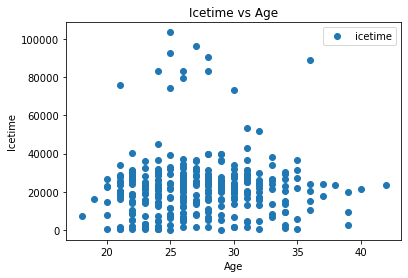

In [17]:
# scatterplot ice time vs age
df_winners.plot(x = 'age', y='icetime',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Icetime vs Age')
plt.xlabel('Age')
plt.ylabel('Icetime')
plt.show()

In [18]:
# runner-up scatterplot
df_runnerup = df_playoffsbio[df_playoffsbio.playoffs=='runner-up']

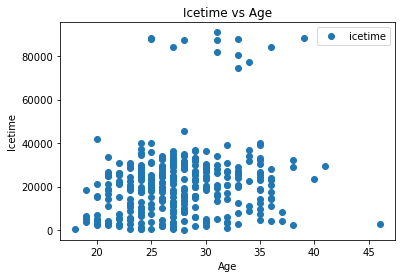

In [19]:
df_runnerup.plot(x = 'age', y='icetime',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Icetime vs Age')
plt.xlabel('Age')
plt.ylabel('Icetime')
plt.show()

In [20]:
# early data
df_early = df_playoffsbio[df_playoffsbio.playoffs=='early']

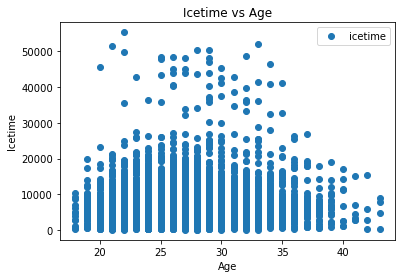

In [21]:
df_early.plot(x = 'age', y='icetime',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Icetime vs Age')
plt.xlabel('Age')
plt.ylabel('Icetime')
plt.show()

In [25]:
# scatter plot by groups of seasons
df_20082012 = df_playoffsbio[df_playoffsbio.season==(2008 or 2009 or 2010 or 2011 or 2012)]

In [26]:
df_20082012.head()

,playerId,season,first_name,last_name,team,position,games_played,icetime,gameScore,year,...,day,weight,height,nationality,shootsCatches,primaryNumber,playoffs,region,age,age_range
0,8471716,2008,Justin,Abdelkader,DET,L,10,4180,3.77,1987,...,25,214,74,USA,L,8,runner-up,north_america,21,under23
16,8465166,2008,Craig,Adams,PIT,R,23,13284,4.58,1977,...,26,200,72,CAN,R,27,winner,north_america,31,27-32
28,8469626,2008,Andrew,Alberts,PHI,D,6,4919,0.50,1981,...,30,218,77,USA,L,41,early,north_america,27,27-32
80,8473573,2008,Artem,Anisimov,NYR,C,1,335,-0.25,1988,...,24,198,76,RUS,L,15,early,europe,20,under23
86,8467353,2008,Nik,Antropov,NYR,C,7,7011,2.81,1980,...,18,245,78,KAZ,L,80,early,europe,28,27-32


In [28]:
df_20082012.shape

(358, 21)

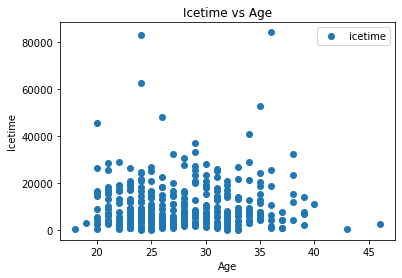

In [29]:
df_20082012.plot(x = 'age', y='icetime',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Icetime vs Age')
plt.xlabel('Age')
plt.ylabel('Icetime')
plt.show()

In [30]:
# scatter plot by groups of seasons
df_20132017 = df_playoffsbio[df_playoffsbio.season==(2013 or 2014 or 2015 or 2016 or 2017)]

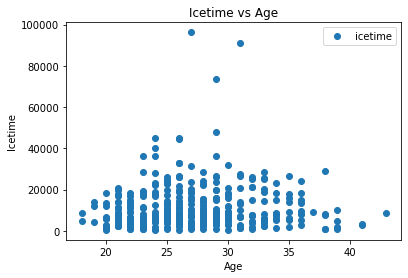

In [31]:
df_20132017.plot(x = 'age', y='icetime',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Icetime vs Age')
plt.xlabel('Age')
plt.ylabel('Icetime')
plt.show()

In [32]:
# scatter plot by groups of seasons
df_20182021 = df_playoffsbio[df_playoffsbio.season==(2018 or 2019 or 2020 or 2021)]

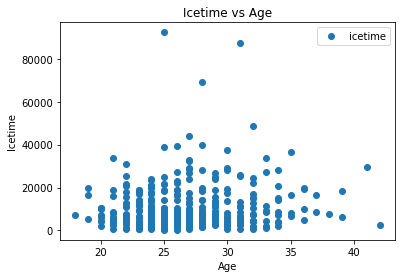

In [33]:
df_20182021.plot(x = 'age', y='icetime',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Icetime vs Age')
plt.xlabel('Age')
plt.ylabel('Icetime')
plt.show()

In [34]:
# check average age
df_20182021['age'].mean()

26.83661971830986

In [35]:
df_20132017['age'].mean()

27.198924731182796

In [36]:
df_20082012['age'].mean()

27.74022346368715

In [38]:
# value counts of age range
df_20182021['age_range'].value_counts()

27-32      143
23-26      125
under23     54
over 33     33
Name: age_range, dtype: int64

In [39]:
df_20132017['age_range'].value_counts()

27-32      131
23-26      124
under23     60
over 33     57
Name: age_range, dtype: int64

In [40]:
df_20082012['age_range'].value_counts()

27-32      120
23-26      120
over 33     68
under23     50
Name: age_range, dtype: int64

# 05 - Hypothesis

I expect that as players get older they will receive more ice time until the age of 32, then ice time will decrease after that.

# 06 - Reshape the Data

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_playoffsbio['age'].values.reshape(-1,1)
y = df_playoffsbio['icetime'].values.reshape(-1,1)

In [42]:
# check it
X

array([[21],
       [22],
       [23],
       ...,
       [27],
       [28],
       [29]], dtype=int64)

In [43]:
# check y
y

array([[4180],
       [4955],
       [8881],
       ...,
       [4136],
       [5548],
       [4126]], dtype=int64)

# 07 - Split data into two sets

In [44]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 08 - Run a Linear Regression

In [45]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

# 09 - Create a Plot that shows the Regression Line

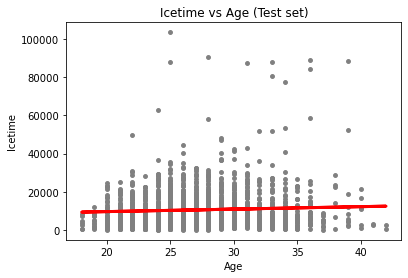

In [48]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Icetime vs Age (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Icetime')
plot_test.show()

There doesn't seem to be much a fit with the data, the line is very flat.

# 10 - Check the model summary statistics RMSE & R2

In [49]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[129.07003739]]
Mean squared error:  109289712.08146554
R2 score:  0.008944857542979134


# 11 - Compare the predicted and actual values of Y

In [52]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3927,10435.431658
1,7469,10693.571733
2,2283,11080.781845
3,3927,9661.011434
4,14373,10951.711808
5,7131,10564.501695
6,7369,11080.781845
7,21748,10048.221546
8,13616,10306.361621
9,11220,10951.711808


# 12 - Compare how the regression fits the training set

In [53]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [54]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [55]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[129.07003739]]
Mean squared error:  107643452.06269047
R2 score:  0.00311997094708083


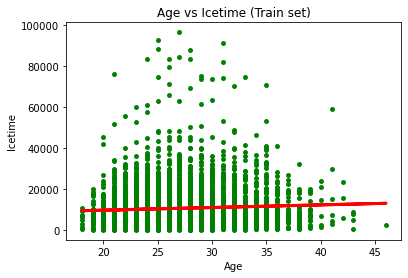

In [56]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Icetime (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Icetime')
plot_test.show()

# 13 - Final Thoughts

My conclusion is that this is not the best method to predict ice time, at least not with a regression line. There will be other methods that will work better. I do think there is a relationship between the two variables but this doesn't show it.